In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt

In [2]:
# load
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    #one hot encode target values:
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [3]:
# prepare / normalise
def normalise_values(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalise to range 0 - 1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [4]:
# define model:
def define_model():
    model = Sequential()
    # play around with he_uniform and he_normal?
    model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu",kernel_initializer='he_uniform'))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# evaluate model
def evaluate_model(dataX, dataY, n_folds=10):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print("> %.3f" % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [32]:
# plot training histories
def visualise_history(histories):
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()


In [30]:
# plot performance
def summarize_performance(scores):
    m, s = mean(scores), std(scores)
    print('Accuracy: mean= %.3f std= %.3f n=%d' % (m * 100.0, s * 100.0, len(scores)))
    plt.boxplot(scores)
    plt.show()

In [31]:
def train_model_and_show_evaluations():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = normalise_values(trainX, testX)
  scores, histories = evaluate_model(trainX,trainY)
  visualise_history(histories)
  summarize_performance(scores)

> 98.417
> 98.650
> 98.850
> 98.800
> 98.817
> 98.783
> 98.833
> 98.900
> 98.683
> 98.900


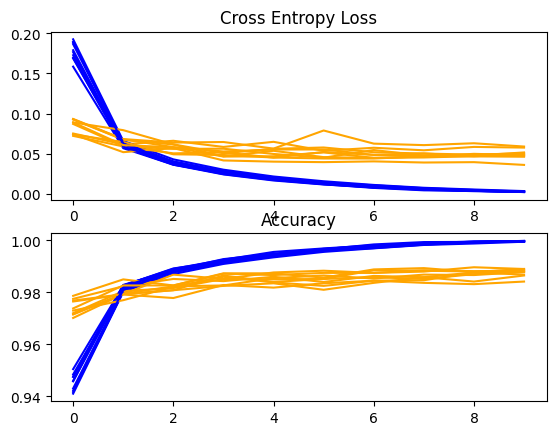

Accuracy: mean= 98.763 std= 0.139 n=10


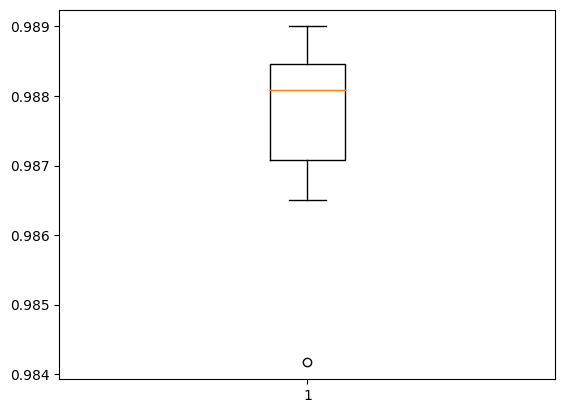

In [34]:
train_model_and_show_evaluations()